In [1]:
import os, argparse, json
from tqdm import tqdm
from collections import OrderedDict

import torch

from option import option
from data import create_dataset, create_dataloader
from model import define_C
from solver import create_solver
from util.metric import MetricMeter

In [2]:
opt = option.parse('./option/test/debug_test_dense201_WSOD.json', is_train=False)

export CUDA_VISIBLE_DEVICES=1


In [3]:
test_loader_dict = OrderedDict()
for name, dataset_opt in opt['datasets'].items():
    test_set = create_dataset(dataset_opt)
    test_loader_dict[name] = create_dataloader(test_set, dataset_opt)
    print('===> Test Dataset: %s   Number of images: [%d]' %
          (name, len(test_set)))

solver = create_solver(opt)

print('===> Start Test')
print("==================================================")

result_dict = OrderedDict()
metric_meter = MetricMeter(class_num=20)

===> Test Dataset: test   Number of images: [5096]
===> Network Summary

Network structure: [DataParallel - densenet201], with parameters: [18,131,348]
===> Loading classifier model from [./experiments/densenet201_object_classification_ADAM_balance/checkpoint/best_ckp.pth]...
===> Solver Initialized : [WSODSolver] || Use GPU : [True]
===> Start Test


In [4]:
it = iter(test_loader_dict['test'])

In [5]:
res_str = {}
for k in opt['solver']['bbox_th']:
    res_str[k] = []

In [6]:
batch = next(it)

In [7]:
solver.feed_data(batch)
solver.test()
metric_meter.add(solver.predict, solver.target)
solver.get_CAMs()
res = solver.detect_box()

In [8]:
# for k, v in res.items():
#     for b, d in enumerate(v):
#         img_name = batch['img_name'][b]
#         img_str_list = []
#         for label, pred in d.items():
#             label_str_list = []
#             for bbox in pred[:-1]:
#                 out_str = '%d %f ' % (label, pred[-1])
#                 x_scale = batch['original_size'][0][b].item() / float(solver.input_size)
#                 y_scale = batch['original_size'][1][b].item() / float(solver.input_size)
#                 scale_box = [bbox[0] * x_scale, bbox[1] * y_scale, 
#                              (bbox[0] + bbox[2]) * x_scale, (bbox[1] + bbox[3]) * y_scale]
#                 out_str += ' '.join([str(int(x)) for x in scale_box])
#                 label_str_list.append(out_str)
#             label_str = '\n'.join(label_str_list)
#             img_str_list.append(label_str)
#         img_str = '\n'.join(img_str_list)
#         res_str[k].append((img_name, img_str))

In [9]:
# for k, v in res_str.items():
#     write_dir = os.path.join(opt['path']['results_root'], 'bbox_th%.1f.txt' % k)
#     os.mkdir(write_dir)
#     for item in v:
#         with open(os.path.join(write_dir, item[0]), 'w') as f:
#             f.write(item[1])

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy as np

In [19]:
i = random.randint(0, len(solver.CAM_list))
print(i)

83


In [20]:
index_list = []
for ind, label in enumerate(solver.target[i].cpu().numpy() > 0.5):
    if label:
        index_list.append(ind)
img = test_set.detransform(batch['img'].cpu()[i])
print(index_list)

[0, 4, 15]


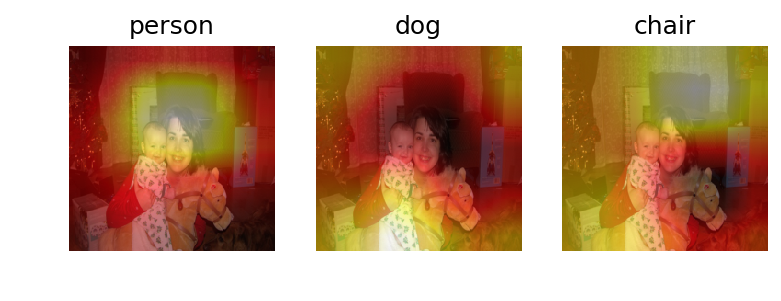

In [21]:
plt.figure(dpi=150)
for j, ind in enumerate(index_list):
    plt.subplot(1, len(index_list), j + 1)
    plt.imshow(img)
    plt.title(test_set.translate_label(solver.target[i])[j])
    plt.imshow(solver.CAM_list[i][:, :, ind], cmap='hot', alpha=0.5)
    plt.axis('off')

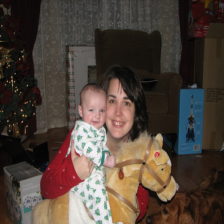

In [22]:
img

In [86]:
res

{0.3: [OrderedDict([(0, [(0, 0, 198, 174), 0.999157190322876]),
               (5, [(44, 0, 180, 185), 0.999821126461029])]),
  OrderedDict([(0,
                [(122, 124, 102, 100), (0, 0, 57, 123), 0.4240014851093292]),
               (8, [(34, 97, 147, 127), 0.9999173879623413])]),
  OrderedDict([(0, [(77, 21, 147, 184), 0.9991679191589355]),
               (5, [(21, 35, 146, 147), 0.9996523857116699])]),
  OrderedDict([(0, [(0, 17, 141, 88), 0.2354748249053955]),
               (10, [(0, 50, 224, 174), 0.9999443292617798]),
               (11, [(0, 34, 224, 190), 0.9944033622741699])]),
  OrderedDict([(14, [(27, 30, 197, 172), 0.9997382760047913]),
               (16, [(24, 61, 200, 163), 0.6078146696090698])]),
  OrderedDict([(15, [(0, 0, 224, 115), 0.9602747559547424]),
               (16, [(0, 0, 224, 224), 0.9999912977218628])]),
  OrderedDict([(0, [(0, 0, 224, 224), 0.999529242515564]),
               (15, [(0, 59, 104, 165), 0.6907614469528198])]),
  OrderedDict([(0, [(0, 0,

dict_keys(['img', 'label', 'img_name', 'original_size'])

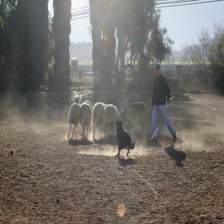

In [63]:
img

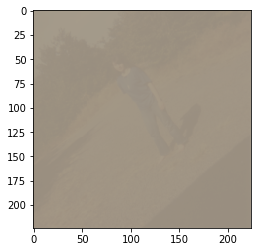

In [38]:
plt.imshow(test_set.detransform(batch['img'].cpu()[i]))

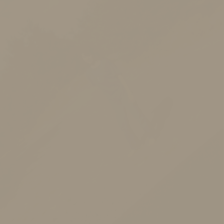

In [40]:
test_set.detransform(batch['img'].cpu()[i])

In [31]:
test_set.translate_label(solver.target[i])

['person', 'aeroplane']